In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn import tree


%pylab inline

train = pd.read_csv('C:\\Users\\gaurav\\Desktop\\Loan\\train_u6lujuX_CVtuZ9i.csv')
test = pd.read_csv('C:\\Users\\gaurav\\Desktop\\Loan\\test_Y3wMUE5_7gLdaTN.csv')

train_original=train.copy()
test_original=test.copy()
print train.columns
#print train.dtypes
print test.isnull().sum()

print train.loc[(train['Gender']=='Female') & (train['Education']=='Graduate')].shape

Populating the interactive namespace from numpy and matplotlib
Index([u'Loan_ID', u'Gender', u'Married', u'Dependents', u'Education',
       u'Self_Employed', u'ApplicantIncome', u'CoapplicantIncome',
       u'LoanAmount', u'Loan_Amount_Term', u'Credit_History', u'Property_Area',
       u'Loan_Status'],
      dtype='object')
Loan_ID               0
Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History        0
Property_Area         0
dtype: int64
(92, 13)


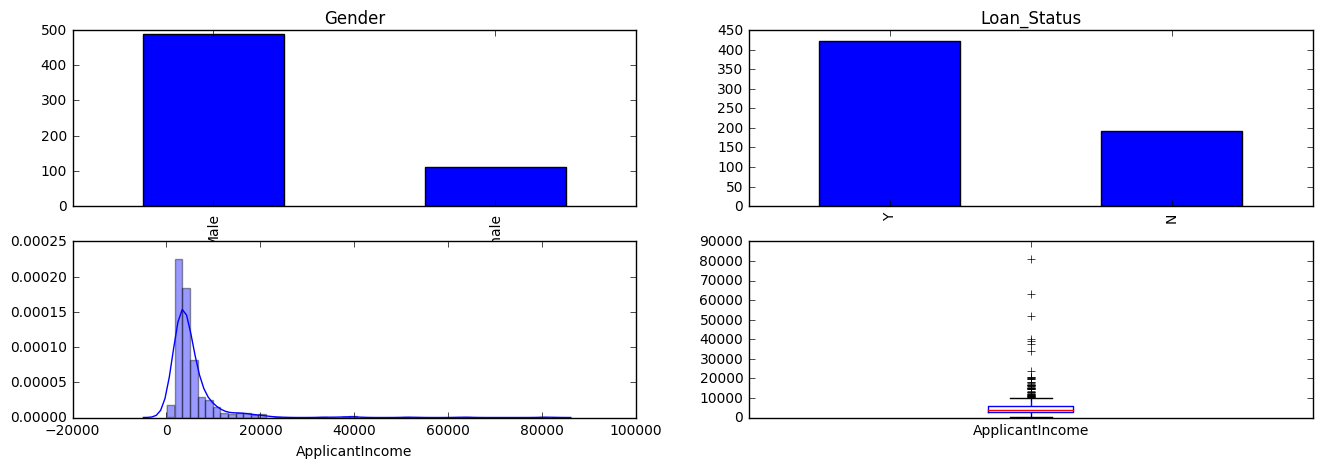

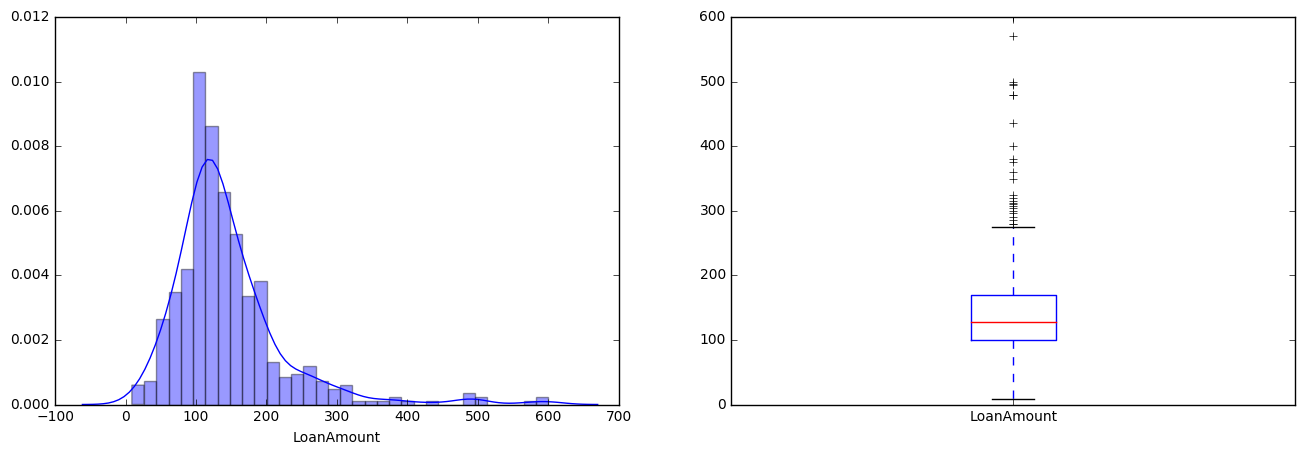

In [2]:
#Univariate Analysis
plt.figure(1)
plt.subplot(221)
train['Gender'].value_counts().plot.bar(title="Gender")
plt.subplot(222)
train['Loan_Status'].value_counts().plot.bar(figsize=(6,4),title="Loan_Status")

#for numerical variable i.e. Applicant and Coapplicant income
plt.subplot(223)
sns.distplot(train['ApplicantIncome'])
plt.subplot(224)
train['ApplicantIncome'].plot.box(figsize=(16,5))
plt.figure(2)
plt.subplot(121)
df = train.dropna()
sns.distplot(df['LoanAmount'])
plt.subplot(122)
df['LoanAmount'].plot.box(figsize=(16,5))

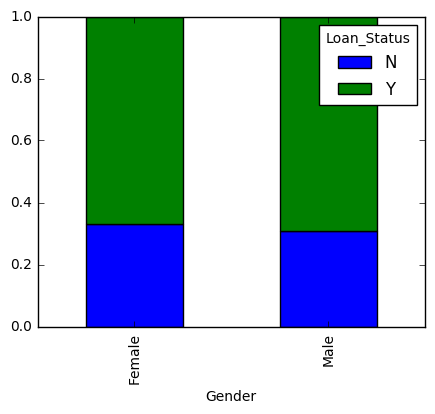

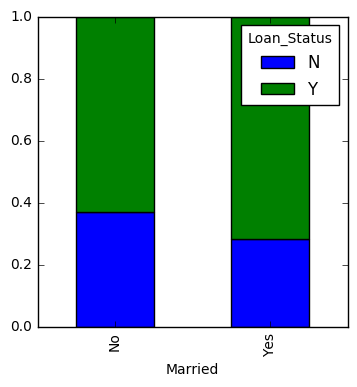

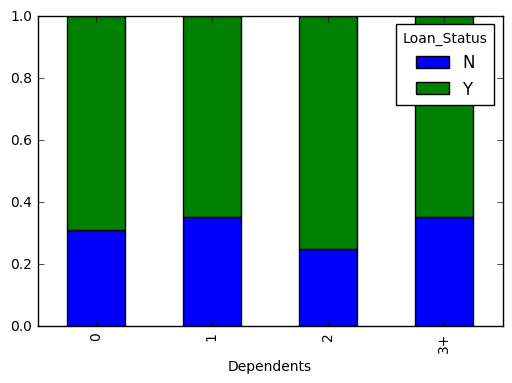

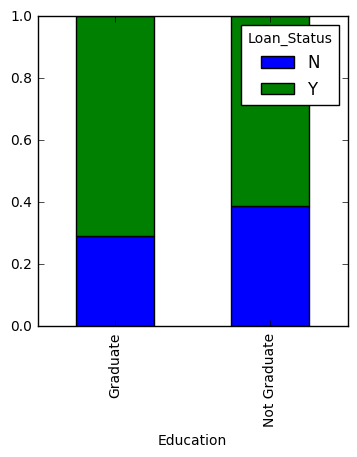

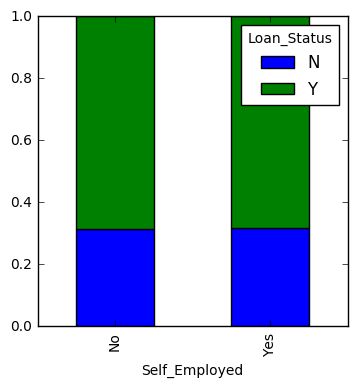

In [3]:
plt.figure(1)
Gender=pd.crosstab(train['Gender'],train['Loan_Status'])
Gender.div(Gender.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(5,4))
#Gender doesn't matter much for Loan Approval

Married=pd.crosstab(train['Married'],train['Loan_Status'])
Dependents=pd.crosstab(train['Dependents'],train['Loan_Status'])
Education=pd.crosstab(train['Education'],train['Loan_Status'])
Self_Employed=pd.crosstab(train['Self_Employed'],train['Loan_Status'])

Married.div(Married.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(4,4))
plt.show()

Dependents.div(Dependents.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True)
plt.show()

Education.div(Education.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(4,4))
plt.show()

Self_Employed.div(Self_Employed.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(4,4))
plt.show()

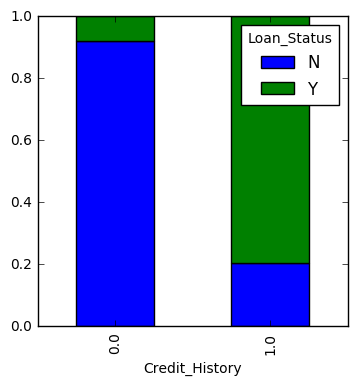

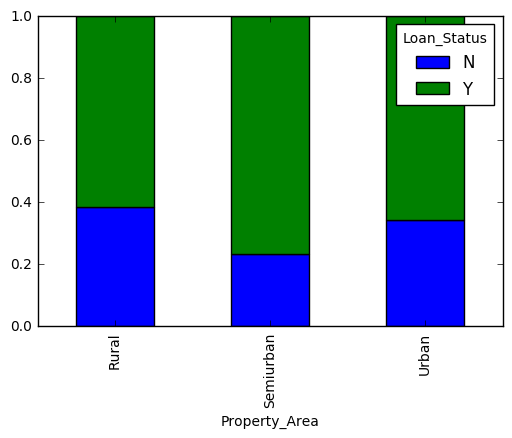

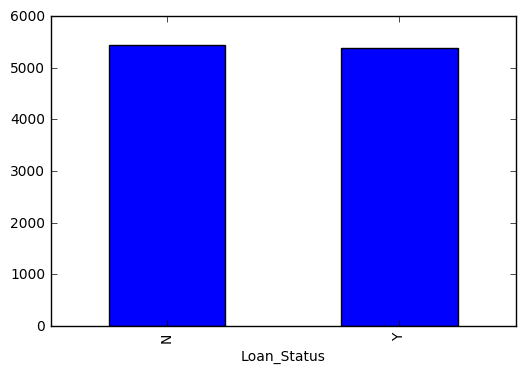

In [4]:
#for categorical variable
Credit_History=pd.crosstab(train['Credit_History'],train['Loan_Status'])
Property_Area=pd.crosstab(train['Property_Area'],train['Loan_Status'])

Credit_History.div(Credit_History.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(4,4))
plt.show()

Property_Area.div(Property_Area.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True)
plt.show()

train.groupby('Loan_Status')['ApplicantIncome'].mean().plot.bar()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64


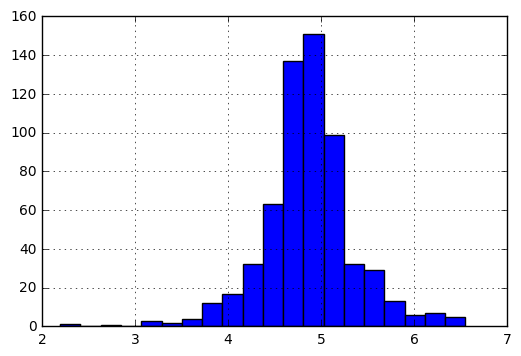

In [5]:
#Outlier Treatment
print train.isnull().sum()

train['Dependents'].replace('3+', 3,inplace=True)
test['Dependents'].replace('3+', 3,inplace=True)
train['Loan_Status'].replace('N', 0,inplace=True)
train['Loan_Status'].replace('Y', 1,inplace=True)

#for categorical variables, we can use mode
train['Gender'].fillna(train['Gender'].mode()[0], inplace=True)
train['Married'].fillna(train['Married'].mode()[0], inplace=True)
train['Dependents'].fillna(train['Dependents'].mode()[0], inplace=True)
train['Self_Employed'].fillna(train['Self_Employed'].mode()[0], inplace=True)
train['Credit_History'].fillna(train['Credit_History'].mode()[0], inplace=True)
train['Loan_Amount_Term'].fillna(train['Loan_Amount_Term'].mode()[0], inplace=True)


#for numerical variables, we can use median
train['LoanAmount'].fillna(train['LoanAmount'].median(), inplace=True)

#Similarly for test data
#test['Credit_History'].replace('', np.nan, inplace=True)
#test.dropna(subset=['Credit_History'], inplace=True)

test['Gender'].fillna(train['Gender'].mode()[0], inplace=True)
test['Married'].fillna(train['Married'].mode()[0], inplace=True)
test['Dependents'].fillna(train['Dependents'].mode()[0], inplace=True)
test['Self_Employed'].fillna(train['Self_Employed'].mode()[0], inplace=True)
test['Credit_History'].fillna(train['Credit_History'].mode()[0], inplace=True)
test['Loan_Amount_Term'].fillna(train['Loan_Amount_Term'].mode()[0], inplace=True)
test['LoanAmount'].fillna(train['LoanAmount'].median(), inplace=True)

train['LoanAmount_log'] = np.log(train['LoanAmount'])
train['LoanAmount_log'].hist(bins=20)
test['LoanAmount_log'] = np.log(test['LoanAmount'])


In [6]:
Total_Income = train['ApplicantIncome'] + train['CoapplicantIncome']
Total_Income_test =  test['ApplicantIncome'] + test['CoapplicantIncome']
ROI = float(10)/float(1200);
Month = train['Loan_Amount_Term']
Emi_Num = train['LoanAmount'] * 1000 * ROI * ((1 + ROI) ** Month)
Emi_Den = ((1 + ROI) ** Month) - 1
Emi = Emi_Num / Emi_Den
ratio = Emi/Total_Income
train['Emi_Ratio'] = ratio
train['Total_Income'] = Total_Income

Month_test = test['Loan_Amount_Term']
test_num = test['LoanAmount'] * 1000 * ROI * ((1 + ROI) ** Month_test)
test_den = ((1 + ROI) ** Month_test) - 1
test_emi = test_num / test_den
test['Emi_Ratio'] = test_emi/Total_Income_test
test['Total_Income'] = Total_Income_test

train=train.drop(['Loan_ID','ApplicantIncome','CoapplicantIncome','Loan_Amount_Term','LoanAmount'],axis=1)
test=test.drop(['Loan_ID','ApplicantIncome','CoapplicantIncome','Loan_Amount_Term','LoanAmount'],axis=1)
X = train.drop('Loan_Status',1)
y = train.Loan_Status

In [7]:
X=pd.get_dummies(X)
train=pd.get_dummies(train)
test=pd.get_dummies(test)
x_train, x_cv, y_train, y_cv = train_test_split(X,y, test_size =0.3)


In [8]:
model = LogisticRegression()
model.fit(x_train, y_train)
pred_cv = model.predict(x_cv)
print round(accuracy_score(y_cv,pred_cv)*100 ,2)
pred_test = model.predict(test)
submission=pd.read_csv("C:\\Users\\gaurav\\Desktop\\Loan\\Sample_Submission_ZAuTl8O_FK3zQHh.csv")
submission['Loan_Status']=pred_test
submission['Loan_ID']=test_original['Loan_ID']
submission['Loan_Status'].replace(0, 'N',inplace=True)
submission['Loan_Status'].replace(1, 'Y',inplace=True)
pd.DataFrame(submission, columns=['Loan_ID','Loan_Status']).to_csv('logistic.csv')


77.3


In [9]:
decisiontree = tree.DecisionTreeClassifier()
decisiontree.fit(x_train, y_train)
y_pred = decisiontree.predict(x_cv)
acc_decisiontree = round(accuracy_score(y_pred, y_cv) * 100, 2)
print(acc_decisiontree)

68.11
